In [25]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os
sys.path.append('../app')
from text_cleaning_module import TextCleaner, load_clean_filtered_dataset
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
df_train, df_val, df_test = load_clean_filtered_dataset()
cleaner = TextCleaner()
df_train["clean_case"] = cleaner.transform(df_train["full_case"])

100%|██████████| 3175/3175 [07:20<00:00,  7.20it/s] 


## Histogram and Boxplot for full_case. We can see the data is highly right skewed. We have some extremely long elements that we need to take care of. The standard deviation is 12 and the max number of array elements is 336.

count    3175.000000
mean        8.992126
std        11.908690
min         2.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       336.000000
Name: full_case_len, dtype: float64


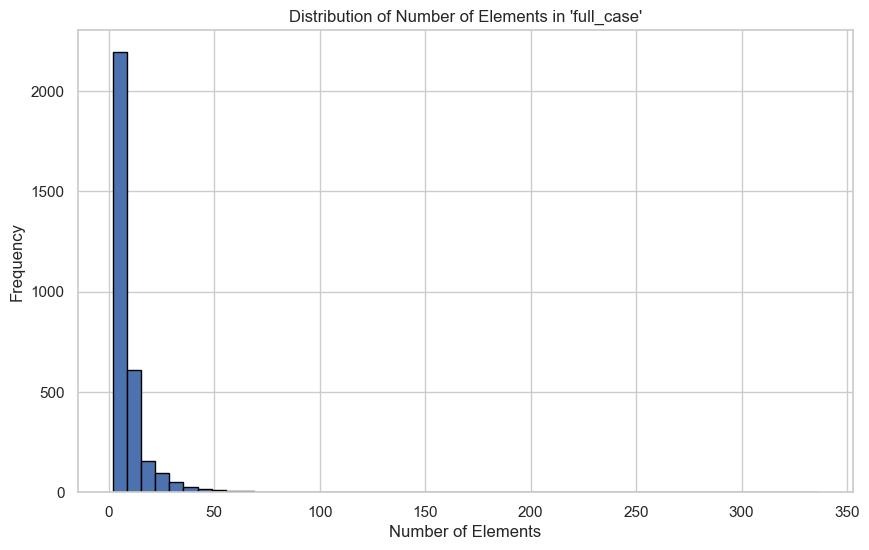

In [33]:
df_train['full_case_len'] = df_train['full_case'].apply(lambda x: len(x) if isinstance(x, np.ndarray) else 0)
print(df_train['full_case_len'].describe())
# Plot histogram of full_case length
plt.hist(df_train['full_case_len'], bins=50, edgecolor='black')
plt.title("Distribution of Number of Elements in 'full_case'")
plt.xlabel("Number of Elements")
plt.ylabel("Frequency")
plt.show()


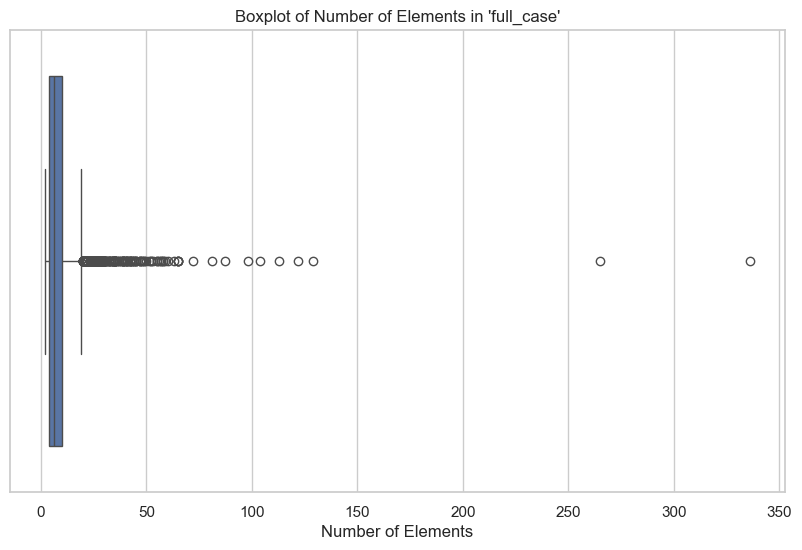

In [30]:
sns.boxplot(x=df_train['full_case_len'])
plt.title("Boxplot of Number of Elements in 'full_case'")
plt.xlabel("Number of Elements")
plt.show()

## Similar strategy for number of words of clean_case. We see more extreme right skewness, higher standard deviation compared to mean value, and 100k+ words. (Kind of Nightmare we would agree)

count    3.175000e+03
mean     1.848043e+04
std      5.251278e+04
min      4.200000e+01
25%      1.995000e+03
50%      5.960000e+03
75%      1.724500e+04
max      1.349356e+06
Name: clean_case_wc, dtype: float64


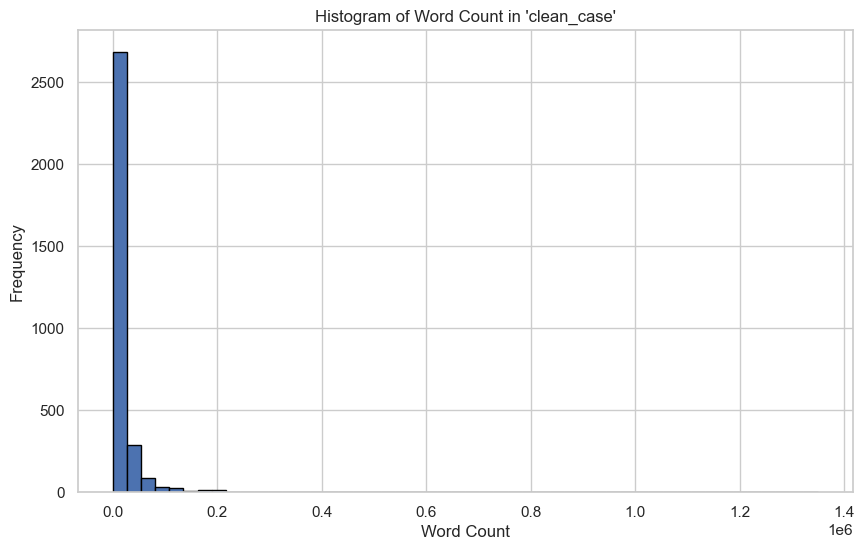

In [41]:
def word_count(text):
    if isinstance(text, str):
        return len(text.split())
    return 0
df_train['clean_case_wc'] = df_train['clean_case'].apply(word_count)
print(df_train['clean_case_wc'].describe())
# Histogram of word count in clean_case
plt.hist(df_train['clean_case_wc'], bins=50, edgecolor='black')
plt.title("Histogram of Word Count in 'clean_case'")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

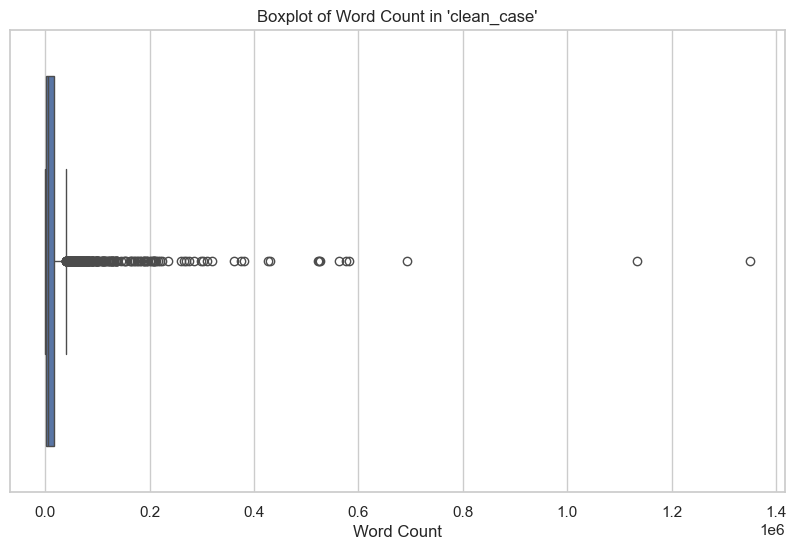

In [43]:
sns.boxplot(x=df_train['clean_case_wc'])
plt.title("Boxplot of Word Count in 'clean_case'")
plt.xlabel("Word Count")
plt.show()

## We also do word count for the summaries provided in the data

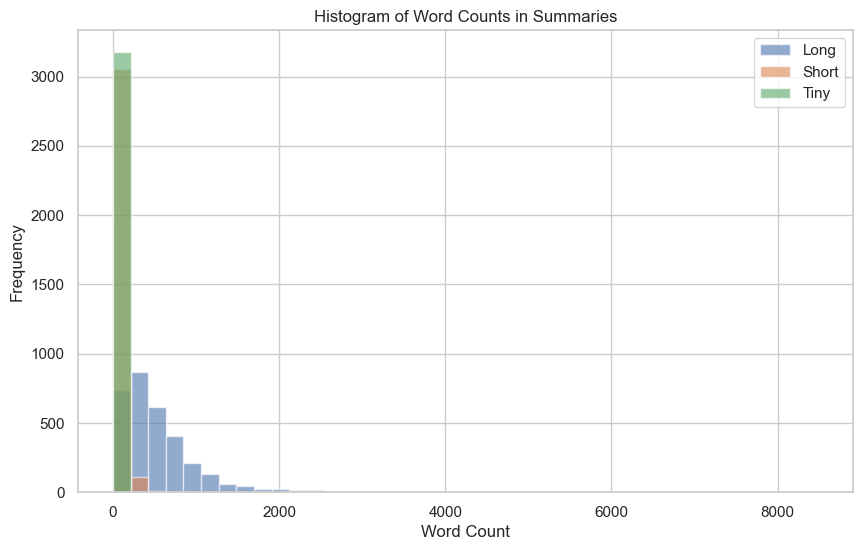

In [48]:
df_train['summary_long_wc'] = df_train['summary_long'].apply(word_count)
df_train['summary_short_wc'] = df_train['summary_short'].apply(word_count)
df_train['summary_tiny_wc'] = df_train['summary_tiny'].apply(word_count)

# Plot word counts for summaries
summary_cols = ['summary_long_wc', 'summary_short_wc', 'summary_tiny_wc']
df_train[summary_cols].plot(kind='hist', bins=40, alpha=0.6)
plt.title("Histogram of Word Counts in Summaries")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(["Long", "Short", "Tiny"])
plt.show()


## Value counts in the two y varaibles: class_action_sought and class_type are also necessary. The reason why we categorize class type is that some of them are so minimal that we suspect the model might learn the pattern to ignore them. 

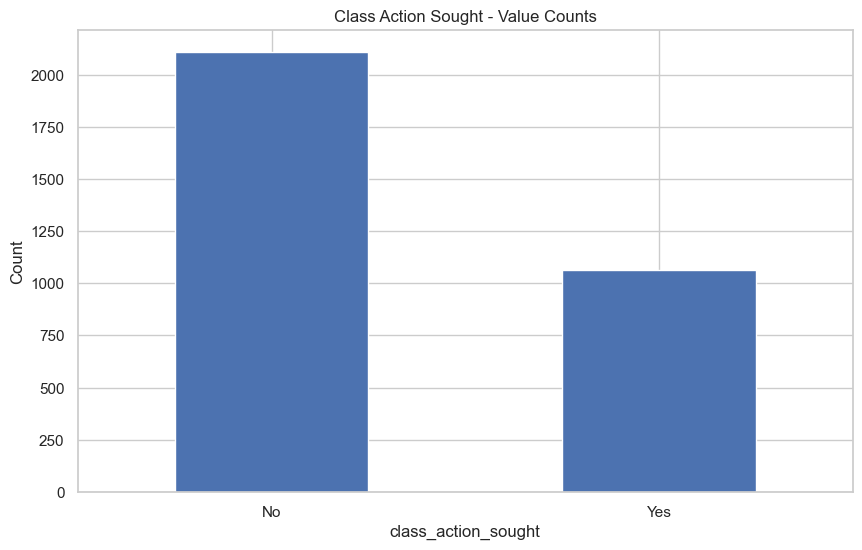

In [53]:
df_train['class_action_sought'].value_counts().plot(kind='bar')
plt.title("Class Action Sought - Value Counts")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()



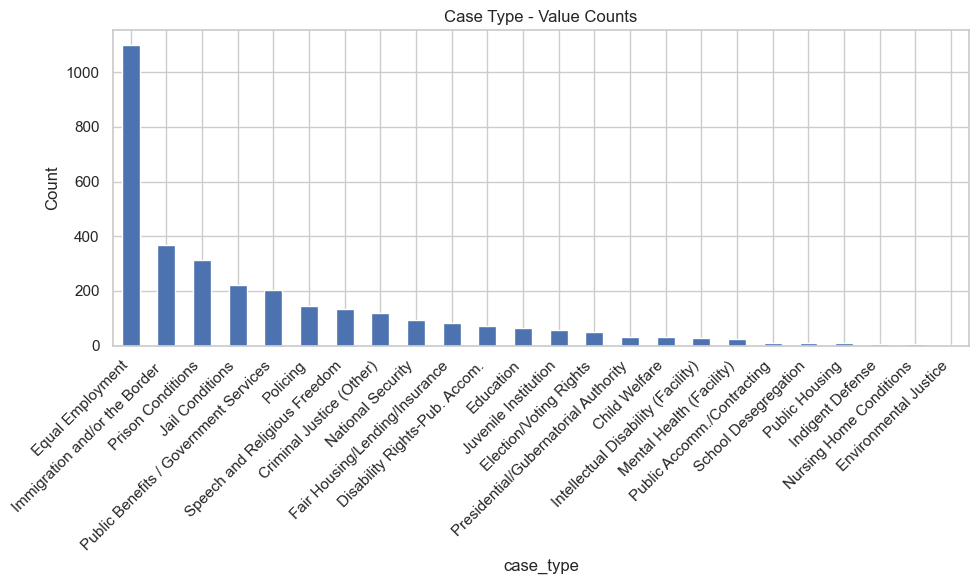

In [55]:
# case_type
df_train['case_type'].value_counts().plot(kind='bar')
plt.title("Case Type - Value Counts")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## We take a look at the distribution of class_type after grouping

In [59]:
group_map = {
    # Criminal Justice
    "Immigration and/or the Border":     "Criminal Justice",
    "Prison Conditions":                 "Criminal Justice",
    "Jail Conditions":                   "Criminal Justice",
    "Policing":                          "Criminal Justice",
    "National Security":                 "Criminal Justice",
    "Criminal Justice (Other)":          "Criminal Justice",

    # Civil Rights
    "Equal Employment":                  "Civil Rights",
    "Fair Housing/Lending/Insurance":    "Civil Rights",
    "Disability Rights-Pub. Accom.":     "Civil Rights",
    "Speech and Religious Freedom":      "Civil Rights",
    "Election/Voting Rights":            "Civil Rights",

    # Social Welfare
    "Public Benefits / Government Services": "Social Welfare",
    "Public Accomm./Contracting":        "Social Welfare",
    "Public Housing":                    "Social Welfare",
    "Child Welfare":                     "Social Welfare",
    "Nursing Home Conditions":           "Social Welfare",
}


for df in (df_train, df_val, df_test):
    df['case_group'] = df['case_type'].map(group_map).fillna("Other")

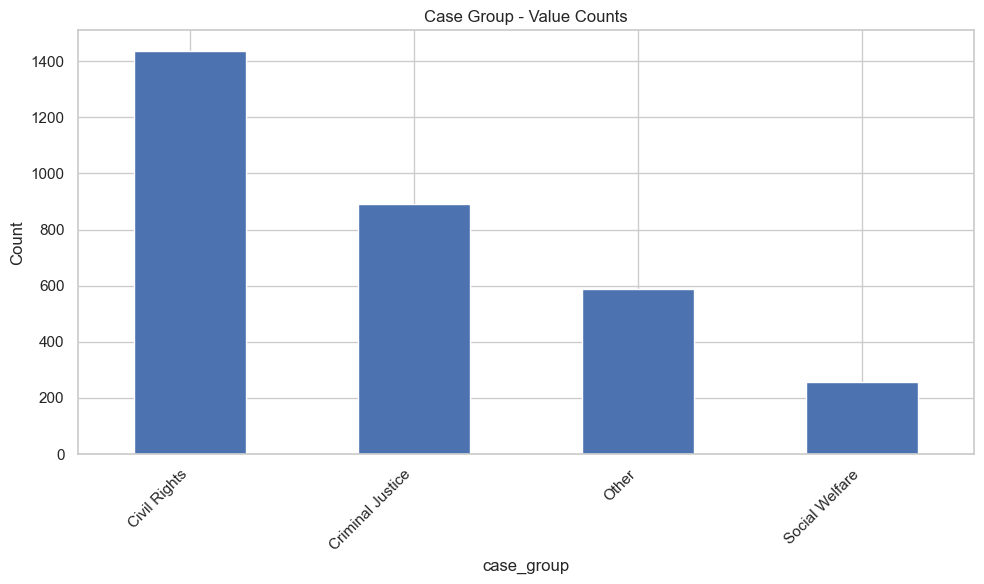

In [62]:
df_train['case_group'].value_counts().plot(kind='bar')
plt.title("Case Group - Value Counts")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()